## 1. Small Example

In [3]:
from heuristics import *
from data_util import *
from cluster import *

input1 = Input("address1", 1)
input2 = Input("address2", 2)
input3 = Input("address3", 3)
input4 = Input("address4", 4)
output1 = Output("address5", 1)

t1 = Transaction([input1, input2, input3, input4], [output1])


input5 = Input("address6", 1)
input6 = Input("address7", 2)
output2 = Output("address6", 8)
t2 = Transaction([input5, input6], [output2])

input7 = Input("address8", 1)
output3 = Output("address6", 8)
t3 = Transaction([input5, input7], [output3])

# my_clusters = cluster([t1], heuristics.shadow, 1)
my_clusters = cluster([t1, t2, t3], heuristics.shadow)

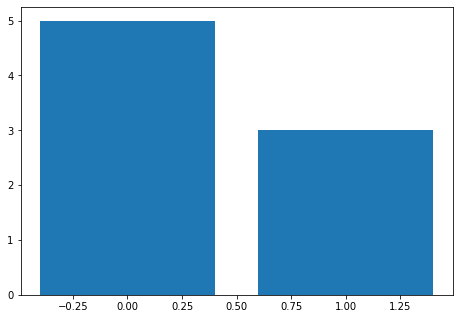

In [4]:
visualize_clusters(my_clusters)

## 2. Format raw data
Data is obtained from: https://www.kaggle.com/xblock/bitcoin-partial-transaction-dataset

In [3]:
parse_data('archive/dataset3_2016_1_1500000')

## 3. Run The Clustering Algorithms

In [28]:
import cluster
from data_util import load_data
from heuristics import *

import pickle
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict

In [29]:
# Load pickled data
data = load_data('dataset3_2016_1_1500000.pkl')

In [30]:
def cluster_and_pickle(heuristic, threshold=None):
    start_time = time.time()
    print("Start Time:", start_time)
    clusters = cluster.cluster(data, heuristic, threshold)
    print('Elapsed Time:', time.time() - start_time)
    
    file_name = 'dataset3_' + heuristic.__name__ + '.pkl'

    if not clusters:
        with open(file_name, 'rb') as f:
            clusters = pickle.load(f)
    else:
        with open(file_name, 'wb') as f:
            pickle.dump(clusters, f)
            
    return cluster
    
def plot_and_analyze(cluster, title):
    # Count the number of clusters at a given size
    cluster_sizes = defaultdict(int)
    total_addr = 0
    for cluster in clusters:
        cluster_size = len(cluster)
        total_addr += cluster_size
        cluster_sizes[cluster_size] += 1

    sizes = list(cluster_sizes.keys())
    counts = list(cluster_sizes.values())
    avg_size = sum(size * count for size, count in zip(sizes, counts)) / sum(counts)
    avg_non_single_size = sum(size * count for size, count in zip(sizes, counts) if size > 1) / \
                          sum(count for size, count in zip(sizes, counts) if size > 1)
    print('Total number of addresses:          ', total_addr)
    print('Total number of clusters:           ', len(clusters))
    print('Number of single-address clusters:  ', cluster_sizes[1])
    print('Size of largest cluster:            ', max(sizes))
    print('Average cluster size:               ', avg_size)
    print('Average cluster size (excluding single-address clusters): ', avg_non_single_size)
    
    # Get cluster size counts in particular range
    x, y = zip(*[(size, count) for size, count in cluster_sizes.items() if 100 > size > 1])

    # Plot
    plt.title()
    plt.figure(figsize=(20,10))
    plt.bar(x, y)
    plt.ylabel('Number of Clusters')
    plt.xlabel('Number of addresses in cluster')
    plt.yscale('log')

In [32]:
optimal_change = cluster_and_pickle(heuristics.optimal_change)

Start Time: 1618876007.19733


KeyboardInterrupt: 

In [ ]:
multi_input = cluster_and_pickle(heuristics.multi_input)

In [ ]:
multi_input_opimal_change = cluster_and_pickle(heuristics.multi_input_optimal_change)

In [ ]:
shadow = cluster_and_pickle(heuristics.shadow)

In [ ]:
plot_and_analyze(optimal_change, "Optimal Change")
plot_and_analyze(multi_input, "Multi Input")
plot_and_analyze(multi_input_optimal_change, "Multi Input Optimal Change")
plot_and_analyze(shadow, "Shadow")

### Hopefully don't need this

In [13]:
# Obtain list of clusters from data
start_time = time.time()
clusters = cluster.cluster(data, multi_input)
print('Elapsed Time:', time.time() - start_time)

Elapsed Time: 651.8322789669037


In [16]:
# Save/Load cluster data for convenience
file_name = 'dataset3_muti_input.pkl'

if not clusters:
    with open(file_name, 'rb') as f:
        clusters = pickle.load(f)
else:
    with open(file_name, 'wb') as f:
        pickle.dump(clusters, f)

In [30]:
# Count the number of clusters at a given size
cluster_sizes = defaultdict(int)
total_addr = 0
for cluster in clusters:
    cluster_size = len(cluster)
    total_addr += cluster_size
    cluster_sizes[cluster_size] += 1

In [49]:
sizes = list(cluster_sizes.keys())
counts = list(cluster_sizes.values())
avg_size = sum(size * count for size, count in zip(sizes, counts)) / sum(counts)
avg_non_single_size = sum(size * count for size, count in zip(sizes, counts) if size > 1) / \
                      sum(count for size, count in zip(sizes, counts) if size > 1)
print('Total number of addresses:          ', total_addr)
print('Total number of clusters:           ', len(clusters))
print('Number of single-address clusters:  ', cluster_sizes[1])
print('Size of largest cluster:            ', max(sizes))
print('Average cluster size:               ', avg_size)
print('Average cluster size (excluding single-address clusters): ', avg_non_single_size)

Total number of addresses:           2651582
Total number of clusters:            1329209
Number of single-address clusters:   963516
Size of largest cluster:             119914
Average cluster size:                1.9948570916988977
Average cluster size (excluding single-address clusters):  4.616074138690103


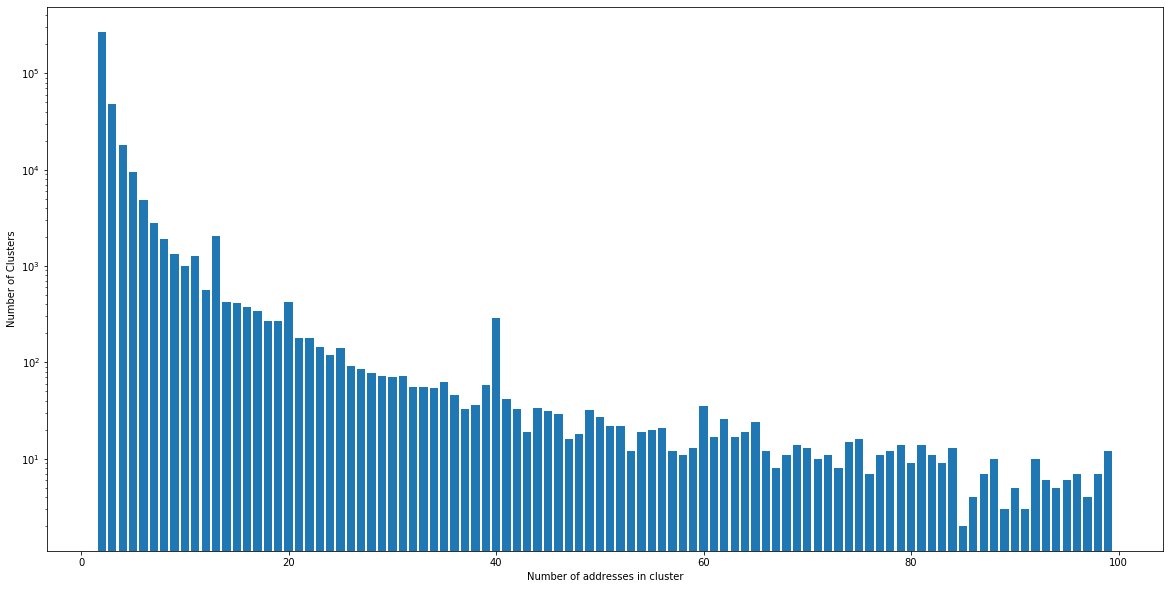

In [53]:
# Get cluster size counts in particular range
x, y = zip(*[(size, count) for size, count in cluster_sizes.items() if 100 > size > 1])

# Plot
plt.figure(figsize=(20,10))
plt.bar(x, y)
plt.ylabel('Number of Clusters')
plt.xlabel('Number of addresses in cluster')
plt.yscale('log')

## 4. Make a histogram for shadow

In [4]:
# this is ticket number 13 in github

# run __get_shadow_data(transactions) on the real data
# then make a histogram of the output

# based on the histogram, do you think we have a clear distinction of who is a merchant? 
# Or will we need to make an assumption on our own?

In [7]:
start_time = time.time()
data = parse_data('archive/dataset3_2016_1_1500000')
print('Elapsed Time:', time.time() - start_time)

Elapsed Time: 34.23472714424133


In [10]:
# Load pickled data
start_time = time.time()
data = load_data('dataset3_2016_1_1500000.pkl')
print('Elapsed Time:', time.time() - start_time)

Elapsed Time: 32.76455616950989


In [14]:
results = heuristics.__get_shadow_data(data)

In [15]:
results

{92941637: 336,
 14482566: 1,
 50151625: 18,
 90097048: 3,
 1867036: 2,
 46562047: 1,
 82561136: 1,
 98544923: 1,
 14271841: 1,
 57883621: 19,
 3521197: 34,
 55197912: 1,
 68138585: 10,
 70813790: 1,
 27652524: 4,
 119898813: 1,
 2774707: 5,
 108550668: 1,
 12331940: 19,
 118708056: 3,
 8311050: 2,
 74066564: 1,
 59389989: 5,
 3203331: 1,
 110812190: 1,
 29631573: 2,
 67179970: 1,
 18819085: 27,
 112100543: 1,
 32639098: 1,
 73698213: 1,
 29667723: 9,
 68972348: 1,
 9847839: 66,
 79311911: 1,
 8122206: 384,
 100727977: 4568,
 66995210: 134,
 122398559: 4,
 53484283: 1,
 70952727: 1,
 108146571: 1,
 33368890: 1,
 111320760: 368,
 26685169: 1,
 95523353: 1,
 90068224: 134,
 105936951: 1,
 19506: 2,
 31046144: 1,
 73218811: 108,
 89188255: 10,
 16756980: 2,
 19572495: 1,
 96618867: 1,
 32343700: 1,
 51870225: 5,
 63728657: 5,
 113511636: 1,
 46329371: 20,
 27974112: 32,
 98694727: 31,
 122995885: 2,
 124475204: 3,
 121670447: 2541,
 124108773: 18,
 77084011: 25,
 80040321: 1,
 112554117: 

In [24]:
addresses = []
merchant_counts = []
for r in results:
    addresses.append(r)
    merchant_counts.append(results[r])

In [33]:
counts = {}

for c in merchant_counts:
    if c in counts:
        counts[c] += 1
    else:
        counts[c] = 1

print(counts)

{1: 1919365, 2: 145668, 3: 54804, 4: 33905, 5: 22969, 6: 15189, 7: 11032, 8: 11561, 9: 18142, 10: 7034, 11: 4669, 12: 3636, 13: 3023, 14: 2454, 15: 2101, 16: 1947, 17: 2561, 18: 1829, 19: 1293, 20: 1029, 21: 964, 22: 780, 23: 658, 24: 622, 25: 531, 26: 494, 27: 523, 28: 412, 29: 311, 30: 310, 31: 315, 32: 257, 33: 246, 34: 239, 35: 186, 36: 187, 37: 176, 38: 159, 39: 155, 40: 152, 41: 99, 42: 117, 43: 106, 44: 112, 45: 115, 46: 90, 47: 81, 48: 61, 49: 63, 50: 77, 51: 68, 52: 60, 53: 74, 54: 49, 55: 55, 56: 48, 57: 52, 58: 63, 59: 56, 60: 51, 61: 42, 62: 35, 63: 35, 64: 21, 65: 31, 66: 30, 67: 29, 68: 24, 69: 29, 70: 20, 71: 28, 72: 19, 73: 39, 74: 24, 75: 21, 76: 19, 77: 17, 78: 32, 79: 17, 80: 18, 81: 13, 82: 17, 83: 14, 84: 14, 85: 10, 86: 20, 87: 18, 88: 9, 89: 29, 90: 17, 91: 13, 92: 8, 93: 13, 94: 17, 95: 13, 96: 10, 97: 12, 98: 8, 99: 7, 100: 9, 101: 9, 102: 7, 103: 11, 104: 12, 105: 12, 106: 5, 107: 12, 108: 8, 109: 12, 110: 10, 111: 6, 112: 12, 113: 8, 114: 8, 115: 6, 116: 11, 

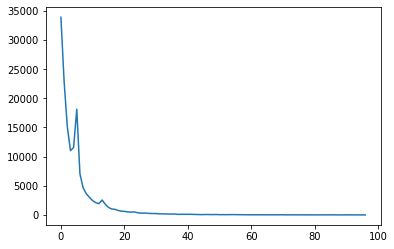

In [39]:
plt.plot(list(counts.values())[3:100])

## Compare Clusters

In [17]:
from sklearn.metrics.cluster import adjusted_rand_score # maybe use adjusted_rand_score if need
# [[1, 2, 3], [4, 5], [6]] -> [0, 0, 0, 1, 1, 2]
adjusted_rand_score([0, 0, 2, 2], [1, 1, 0, 0])

1.0

In [20]:
from sklearn.metrics import mutual_info_score

In [18]:
# implement split/join